In [52]:
from IPython.core.display import display, HTML, Markdown
import networkx as nx
import matplotlib.pyplot as plt

def visualizza(grafo):
    #layout grafo
    pos=nx.planar_layout(grafo)
    #disegna nodi e etichette sui nodi
    nx.draw_networkx_nodes(grafo, pos)
    nx.draw_networkx_labels(grafo, pos)
    #disegna archi e etichette sugli archi
    nx.draw_networkx_edges(grafo, pos)
    labels = nx.get_edge_attributes(grafo,'w')
    nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels)

    plt.show()



In [56]:
#grafo ciclo negativo
nodes=[0,1,2,3]
edges=[(0,2,{'w': 1}),(2,1,{'w': 1}),(2,3,{'w': 2}),(1,0,{'w': -5}),(1,3,{'w': 1})]
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

#grafo senza cicli negativi
nodes=[0,1,2,3]
edges=[(0,2,{'w': -1}),(2,1,{'w': -1}),(2,3,{'w': 2}),(1,0,{'w': 4}),(1,3,{'w': 1})]
H = nx.DiGraph()
H.add_nodes_from(nodes)
H.add_edges_from(edges)

## Esercizio \[60 pts\]
(CICLI)

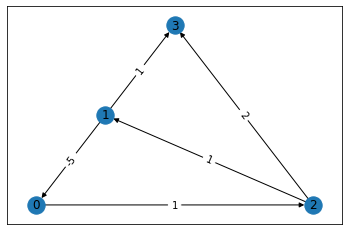

In [55]:
# Ecco il grafo in input:
visualizza(G)

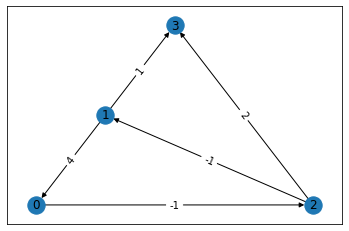

In [57]:
visualizza(H)

__Richieste__:
[15pt] Portati in una configurazione col minor numero possibile di luci accese. Puoi effettuare una mossa alla volta utilizzando le funzioni $flippa\_riga(indice\_riga)$ e $flippa\_colonna(indice\_colonna)$ per spostarti un pò alla volta fino ad una configurazione che reputi ottima.

In [19]:
# Certificato di si, HA CICLI NEGATIVI
# fornisci sottosequenza di archi


Agendo sugli interruttori settati come segue:<br><b>   Interruttori di riga:</b> [0, 0, 1, 1, 0, 0]<br><b>   Interruttori di colonna:</b> [0, 0, 1, 0, 0, 1, 0, 1]

Ti porti dalla configurazione iniziale riportata in $p$ nella seguente configurazione finale:<br>

0 0 0 0 1 0 0 0 
0 0 0 0 0 0 1 1 
0 0 0 0 0 0 1 0 
0 0 0 0 1 1 0 0 
0 0 0 0 0 0 0 0 
1 0 0 0 1 0 0 0 


Attualmente ci sono <b>8 luci accese</b>.

In [ ]:
# Certificato di no, fornire peso che fa si che tutti gli archi abbiano un peso positivo
# i nodi vanno da 1 a n-1, mettimi il valore da sommare per far si di farmi vedere che tutti i cicli sono positivi

lista_pesi=[1 , 5 ,6 , 9, 41]